# Machine Learnig Bootcamp
# HomeWork 3

Getting the data,
For this Homework,

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

In [3]:
Data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


## Data preparation
Check if the missing values are presented in the features.
If there are missing values:
For caterogiral features, replace them with 'NA'
For numerical features, replace with with 0.0
Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [5]:
missing_values = Data.isnull().sum().loc[lambda x : x > 0].shape[0]
print(f'The number of features with missing values is {missing_values}')


The number of features with missing values is 5


In [6]:
if missing_values > 0:
    categorical = Data.select_dtypes(include=['object']).columns
    numerical = Data.select_dtypes(include=['number']).columns

    Data[categorical] = Data[categorical].fillna('NA')
    Data[numerical] = Data[numerical].fillna(0.0)

In [7]:
missing_values = Data.isnull().sum().loc[lambda x : x > 0].shape[0]
print(f'The number of features with missing values is {missing_values}')

The number of features with missing values is 0


In [8]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical_ = ['number_of_courses_viewed', 'interaction_count', 'lead_score', 'annual_income']

In [9]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(Data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
y_train = df_train['converted'].values
y_val = df_val['converted'].values
y_test = df_test['converted'].values

In [13]:
len(y_train)

876

In [14]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

## Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['balance'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

lead_score
number_of_courses_viewed
interaction_count
annual_income

In [15]:
from sklearn.metrics import roc_auc_score

aucs = {}

for n in numerical_:
    score = df_train[n] 
    auc = roc_auc_score(y_train,score)
    if auc < 0.5:
        auc = roc_auc_score(y_train, -score)
    aucs[n] = auc

print(aucs)


{'number_of_courses_viewed': 0.7635680590007088, 'interaction_count': 0.738270176293409, 'lead_score': 0.6144993577250176, 'annual_income': 0.5519578313253012}


In [16]:
print(f'Answer of q1 is : number_of_courses_viewed')

Answer of q1 is : number_of_courses_viewed


## Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

0.32
0.52
0.72
0.92

In [17]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
dv = DictVectorizer(sparse=False)

In [18]:
dv,
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
train_dicts = df_train[categorical + numerical_].to_dict(orient ='records')

In [20]:
X_train = dv.fit_transform(train_dicts)

In [21]:
val_dicts  = df_val[categorical + numerical_].to_dict(orient = 'records')

In [22]:
X_val = dv.fit_transform(val_dicts)

In [51]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [23]:
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
y_pred = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(round(auc, 3))

0.817


## Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

0.145
0.345
0.545
0.745

In [26]:
from sklearn.metrics import precision_score, recall_score

In [41]:
thresholds = np.arange(0.0, 1.01, 0.01)
precisions = []
recalls = []
y_pred_val = model.predict_proba(X_val)[:, 1]


for t in thresholds:
    y_pred = (y_pred_val >= t)
    precisions.append(precision_score(y_val, y_pred, zero_division=0))
    recalls.append(recall_score(y_val, y_pred))



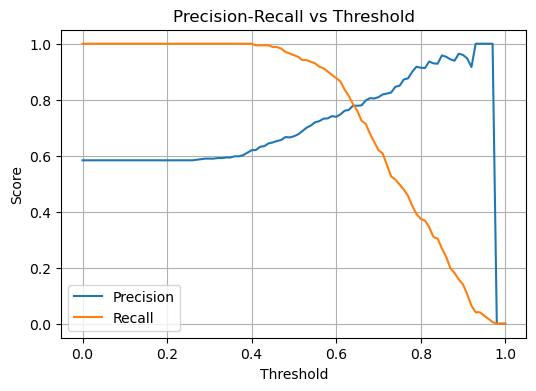

In [42]:
plt.figure(figsize=(6,4))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
print('Answer of q3 is : .745')

Answer of q3 is : .745


## Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F
1
=
2
⋅
P
⋅
R
P
+
R

Where 
P
 is precision and 
R
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

0.14
0.34
0.54
0.74

In [46]:
from sklearn.metrics import precision_score, recall_score , f1_score

thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

import numpy as np
from sklearn.metrics import f1_score

thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred = (y_pred_val >= t)
    f1_scores.append(f1_score(y_val, y_pred, zero_division=0))


In [47]:
f1_scores = np.array(f1_scores)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print("🔹 Threshold with maximal F1:", round(best_threshold, 3))

🔹 Threshold with maximal F1: 0.57


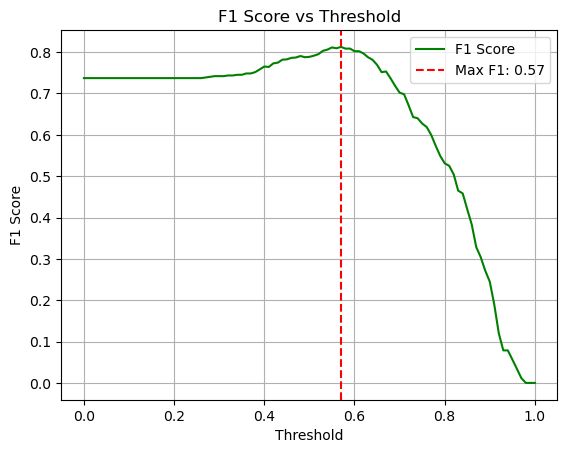

In [48]:

plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Max F1: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()


## Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard deviation of the scores across different folds?

0.0001
0.006
0.06
0.36

In [49]:
from sklearn.model_selection import KFold

In [50]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
auc_scores = []

In [ ]:
X = df_full_train.drop(columns=['converted'])
y = df_full_train['converted'].values

dv = DictVectorizer(sparse=False)
X_encoded = dv.fit_transform(X.to_dict(orient='records'))

array([[5.6659e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.6171e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        2.0000e+00],
       [6.6523e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [7.3688e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [7.6723e+04, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        2.0000e+00],
       [5.1441e+04, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00]], shape=(1169, 31))

In [62]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1)
auc_scores = []

for train_idx, val_idx in kf.split(X_encoded):
    X_train, X_val = X_encoded[train_idx], X_encoded[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred_prob = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred_prob)
    auc_scores.append(auc)

std_auc = np.std(auc_scores)
print("AUC scores:", np.round(auc_scores, 3))
print("Standard deviation of AUC:", round(std_auc, 3))


AUC scores: [0.806 0.871 0.775 0.802 0.856]
Standard deviation of AUC: 0.036


## Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.000001, 0.001, 1]
Initialize KFold with the same parameters as previously
Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

0.000001
0.001
1
If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [63]:
C_values = [0.000001, 0.001, 1]
kf = KFold(n_splits=5, shuffle=True, random_state=1)

results = {}


In [64]:
for C in C_values:
    auc_scores = []
    
    for train_idx, val_idx in kf.split(X_encoded):
        X_train, X_val = X_encoded[train_idx], X_encoded[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)
        
        y_pred_prob = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred_prob)
        auc_scores.append(auc)
    
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    results[C] = (round(mean_auc, 3), round(std_auc, 3))


In [66]:

best_C = min([C for C, (mean, std) in results.items() 
              if mean == max([m for m, s in results.values()])],
             key=lambda x: results[x][1])

print("Results (mean, std):", results)
print("Best C:", best_C)


Results (mean, std): {1e-06: (np.float64(0.56), np.float64(0.024)), 0.001: (np.float64(0.867), np.float64(0.029)), 1: (np.float64(0.822), np.float64(0.036))}
Best C: 0.001


# Homework 4 Completed!